In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ml_data.csv to ml_data.csv


In [ ]:
data = pd.read_csv('ml_data.csv')
data.head()

,Step,Time,Temp,PotEng,KinEng,TotEng,Press,Volume
0,2,0.001,300.00000,6860.6760,155.073400,7015.7494,585803.95,96071.912
1,1000,0.999,147.06059,6939.8307,76.017286,7015.8480,590400.73,96071.912
2,2000,1.999,149.69506,6938.4644,77.379070,7015.8434,590319.83,96071.912
3,3000,2.999,146.54080,6940.0990,75.748597,7015.8476,590415.22,96071.912
4,4000,3.999,151.12514,6937.7277,78.118294,7015.8460,590278.87,96071.912


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Step    534 non-null    int64  
 1   Time    534 non-null    float64
 2   Temp    534 non-null    float64
 3   PotEng  534 non-null    float64
 4   KinEng  534 non-null    float64
 5   TotEng  534 non-null    float64
 6   Press   534 non-null    float64
 7   Volume  534 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 33.5 KB


In [ ]:
import seaborn as sns

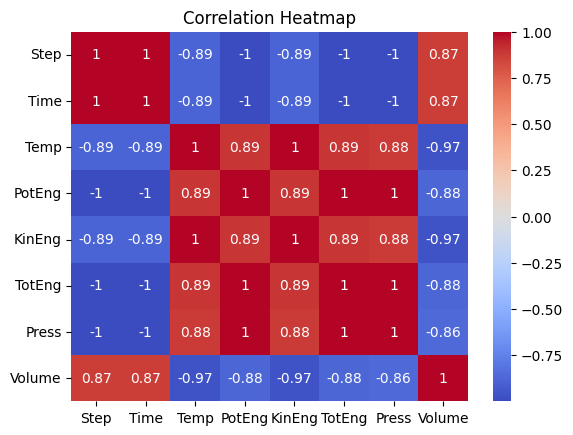

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


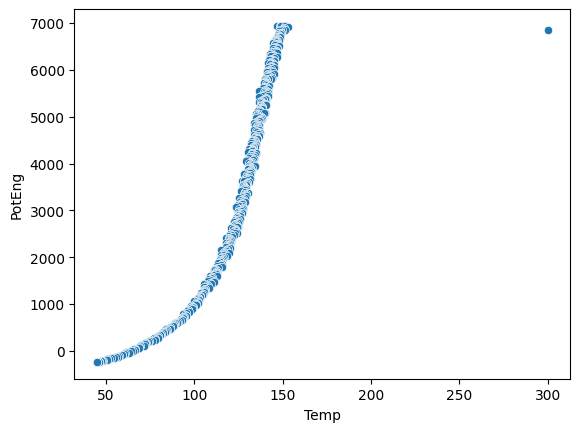

In [ ]:
sns.scatterplot(data=data,x="Temp",y="PotEng")
plt.show()

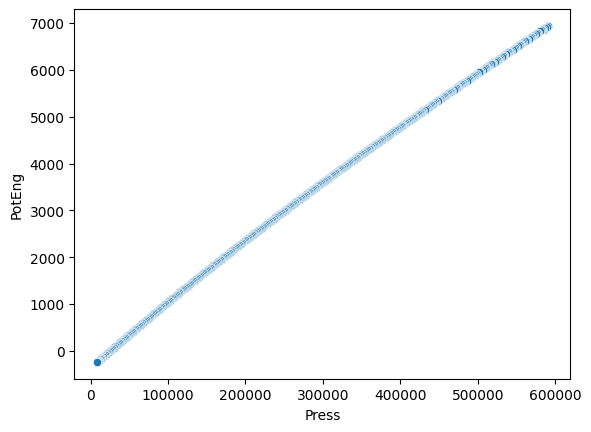

In [ ]:
sns.scatterplot(data=data,x="Press",y="PotEng")
plt.show()

In [ ]:
X  = data[["Temp","Press"]]
Y = data["PotEng"]

In [ ]:
X.head()

,Temp,Press
0,300.00000,585803.95
1,147.06059,590400.73
2,149.69506,590319.83
3,146.54080,590415.22
4,151.12514,590278.87


In [ ]:
Y.head()

,PotEng
0,6860.6760
1,6939.8307
2,6938.4644
3,6940.0990
4,6937.7277


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_lm = LinearRegression()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model_lm.fit(X_train_scaled,Y_train)

LinearRegression()

In [ ]:
y_pred = model_lm.predict(X_test_scaled )

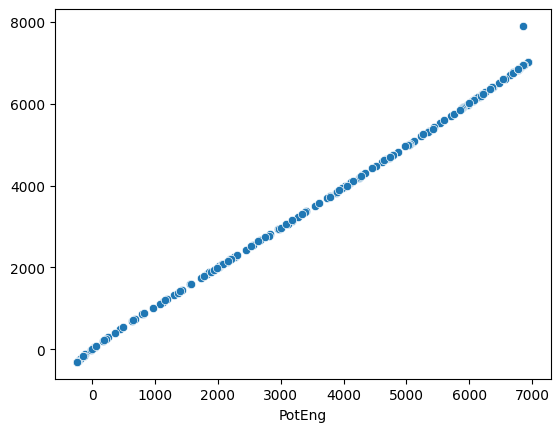

In [ ]:
sns.scatterplot(x=Y_test,y=y_pred)
plt.show()

In [ ]:
from sklearn.metrics import r2_score, root_mean_squared_error
import numpy as np

r2 = r2_score(Y_test, y_pred)
rmse = root_mean_squared_error(Y_test, y_pred)


print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9986
RMSE: 88.3659


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [ ]:
# ------------------------------------------------------------
models = {
    "LinearRegression": (LinearRegression(), {}),

    "RidgeRegression": (Ridge(), {
        'alpha': [0.1, 1, 10]   # small, medium, large regularization
    }),

    "DecisionTree": (DecisionTreeRegressor(random_state=42), {
        'max_depth': [5, 10, None]   # shallow, medium, full depth
    }),

    "RandomForest": (RandomForestRegressor(random_state=42), {
        'n_estimators': [100, 200],   # fewer trees for speed
        'max_depth': [10, None]
    })
}



In [ ]:
results = []

for name, (model, params) in models.items():
    print(f"\n🔹 Tuning {name} ...")

    if params:
        grid = GridSearchCV(model, params, scoring='r2', cv=3, n_jobs=-1)
        grid.fit(X_train, Y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
    else:
        model.fit(X_train, Y_train)
        best_model = model
        best_params = "N/A"

    y_pred = best_model.predict(X_test)
    r2 = r2_score(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred) # Calculate MSE first
    rmse = np.sqrt(mse) # Then take the square root for RMSE

    results.append({
        "Model": name,
        "Best Params": best_params,
        "R² Score": r2,
        "RMSE": rmse
    })


🔹 Tuning LinearRegression ...

🔹 Tuning RidgeRegression ...

🔹 Tuning DecisionTree ...

🔹 Tuning RandomForest ...


In [ ]:
results_df = pd.DataFrame(results)

In [ ]:
results_df.head()

,Model,Best Params,R² Score,RMSE
0,LinearRegression,N/A,0.998568,88.365887
1,RidgeRegression,{'alpha': 0.1},0.998542,89.154898
2,DecisionTree,{'max_depth': None},0.999872,26.455220
3,RandomForest,"{'max_depth': None, 'n_estimators': 200}",0.999953,16.082127


In [ ]:
results_df["R² Score"] = results_df["R² Score"].round(4)
results_df["R² Score"]

,R² Score
0,0.9986
1,0.9985
2,0.9999
3,1.0000


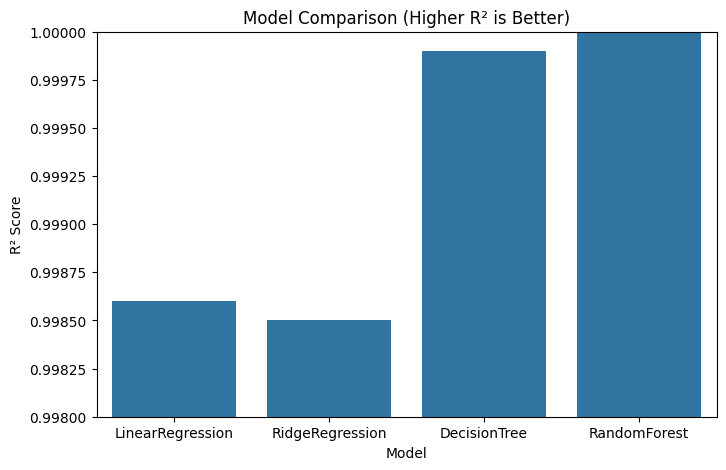

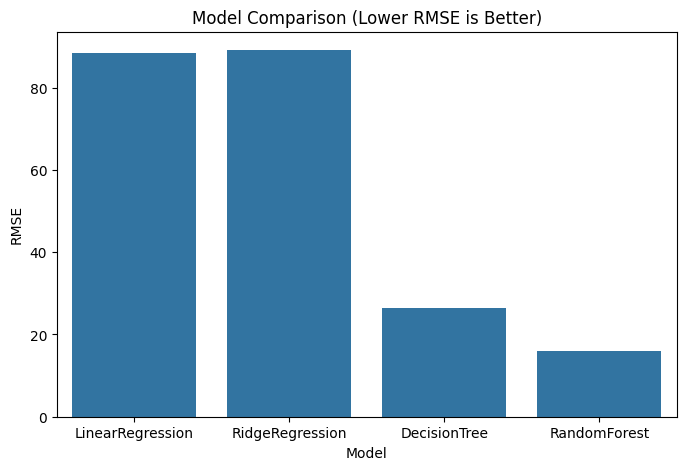

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="R² Score", data=results_df,)
plt.title("Model Comparison (Higher R² is Better)")
plt.ylim(0.998, 1)
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="RMSE", data=results_df)
plt.title("Model Comparison (Lower RMSE is Better)")
plt.show()

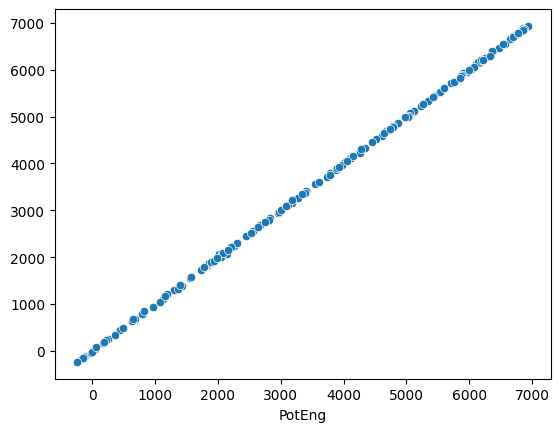

In [ ]:
sns.scatterplot(x=Y_test,y=y_pred)
plt.show()

/tmp/ipython-input-2816029486.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R² Score", data=results_df, palette="viridis")


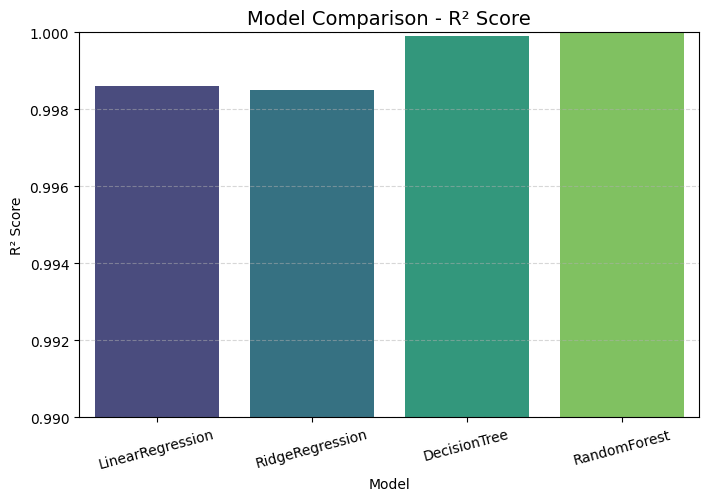

/tmp/ipython-input-2816029486.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=results_df, palette="magma")


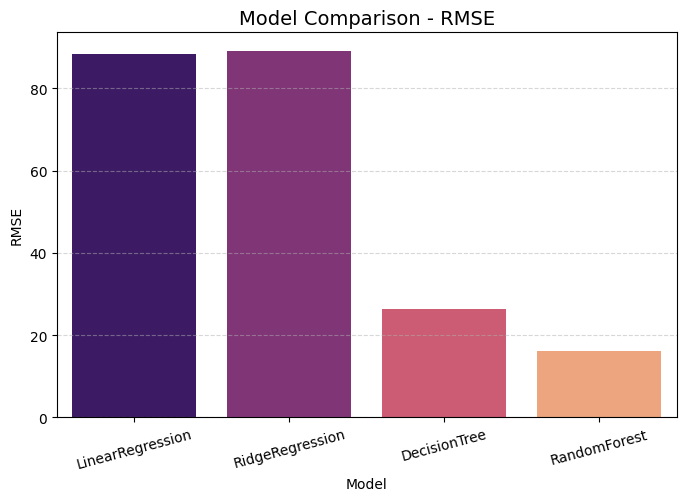

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="R² Score", data=results_df, palette="viridis")
plt.title("Model Comparison - R² Score", fontsize=14)
plt.ylim(0.99, 1.00)
plt.xticks(rotation=15)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

# --- Plot RMSE comparison ---
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="RMSE", data=results_df, palette="magma")
plt.title("Model Comparison - RMSE", fontsize=14)
plt.xticks(rotation=15)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

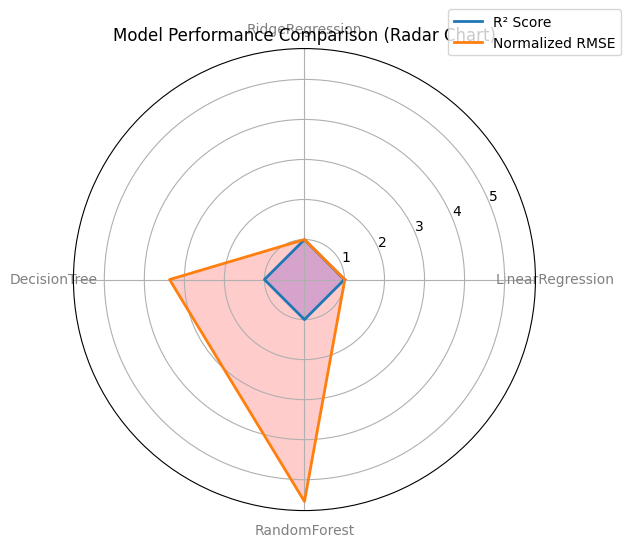

In [ ]:
from math import pi

# Normalize RMSE so lower values = better
metrics_norm = results_df.copy()
metrics_norm["RMSE"] = metrics_norm["RMSE"].max() / metrics_norm["RMSE"]

categories = list(metrics_norm["Model"])
values1 = metrics_norm["R² Score"].tolist()
values2 = metrics_norm["RMSE"].tolist()

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
values1 += values1[:1]
values2 += values2[:1]
angles += angles[:1]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=10)

ax.plot(angles, values1, linewidth=2, linestyle='solid', label="R² Score")
ax.fill(angles, values1, 'b', alpha=0.2)

ax.plot(angles, values2, linewidth=2, linestyle='solid', label="Normalized RMSE")
ax.fill(angles, values2, 'r', alpha=0.2)

plt.title("Model Performance Comparison (Radar Chart)")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()


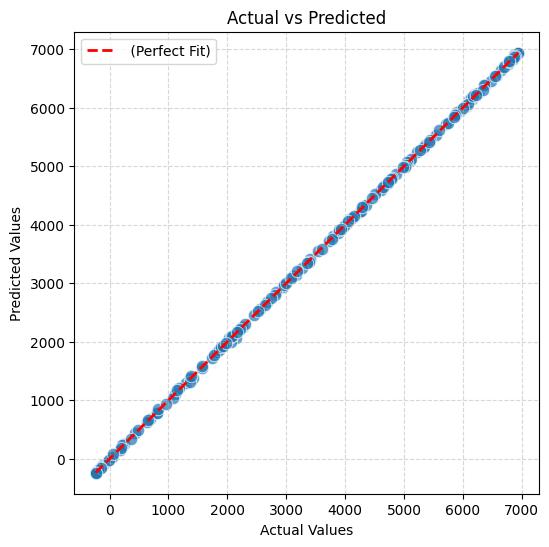

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=Y_test, y=y_pred,s=80,alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         'r--', linewidth=2, label=' (Perfect Fit)')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


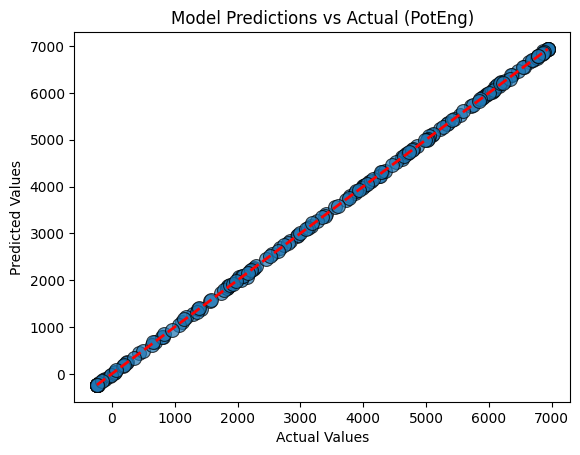

In [ ]:
sns.scatterplot(x=Y_test, y=y_pred, s=100, alpha=0.7, edgecolor='k')
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         'r--', linewidth=2, label=' (Perfect Fit)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs Actual (PotEng)')
plt.show()


In [ ]:
data.head(8)

,Step,Time,Temp,PotEng,KinEng,TotEng,Press,Volume
0,2,0.001,300.00000,6860.6760,155.073400,7015.7494,585803.95,96071.912
1,1000,0.999,147.06059,6939.8307,76.017286,7015.8480,590400.73,96071.912
2,2000,1.999,149.69506,6938.4644,77.379070,7015.8434,590319.83,96071.912
3,3000,2.999,146.54080,6940.0990,75.748597,7015.8476,590415.22,96071.912
4,4000,3.999,151.12514,6937.7277,78.118294,7015.8460,590278.87,96071.912
5,5000,4.999,149.25658,6938.6930,77.152417,7015.8454,590333.26,96071.912
6,6000,5.999,148.61542,6939.0245,76.820995,7015.8455,590352.19,96071.912
7,7000,6.999,151.79096,6937.3814,78.462466,7015.8439,590258.32,96071.912


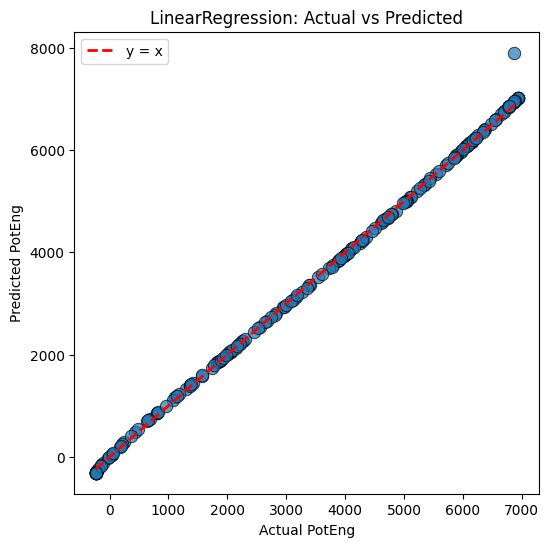

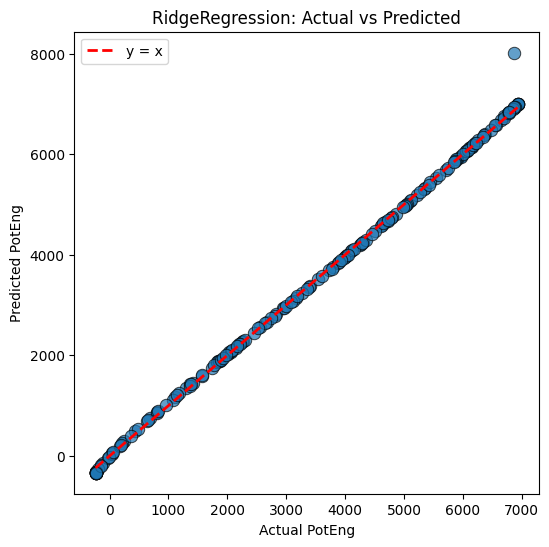

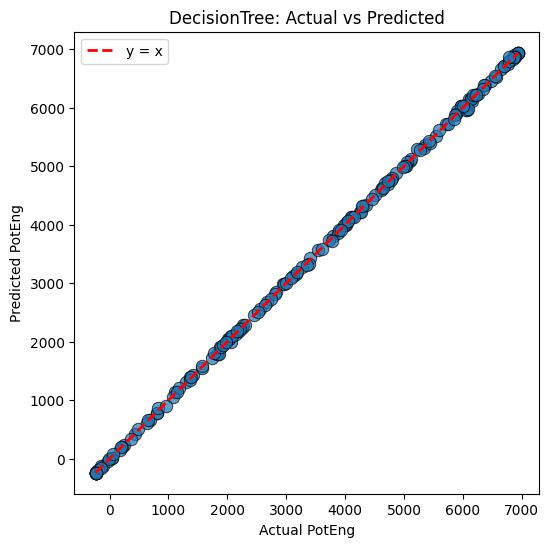

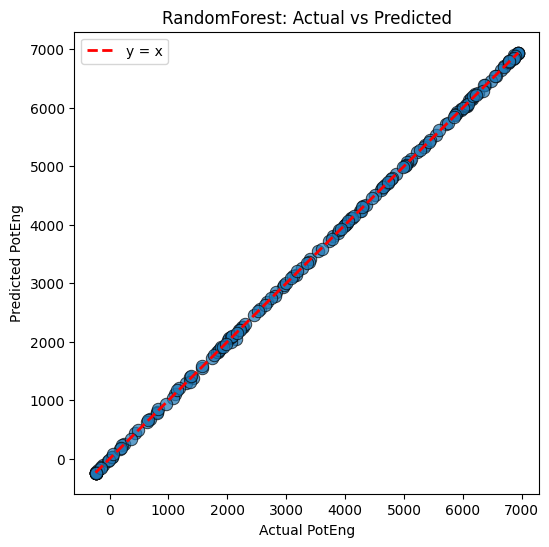

/tmp/ipython-input-2847529734.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2", data=results_df, palette="Blues_d")


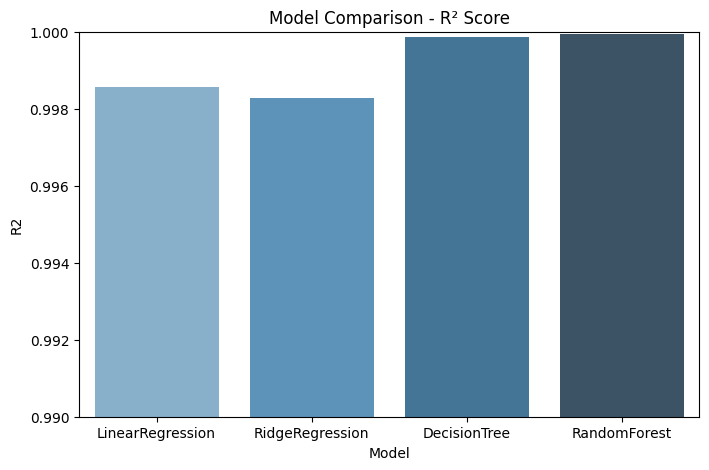

/tmp/ipython-input-2847529734.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=results_df, palette="Oranges_d")


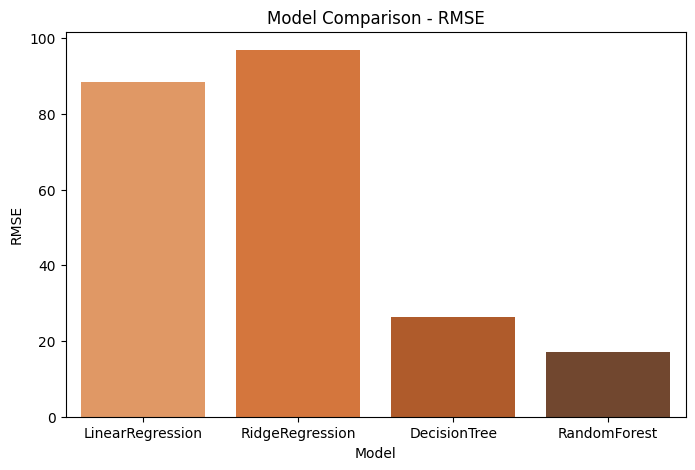

Model Performance Summary:

              Model        R2       RMSE
0  LinearRegression  0.998568  88.365887
1   RidgeRegression  0.998279  96.858346
2      DecisionTree  0.999872  26.455220
3      RandomForest  0.999947  16.997098


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

results = {}

# Train and evaluate each model
for name, (model, params) in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    r2 = r2_score(Y_test, Y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    results[name] = {"R2": r2, "RMSE": rmse}

    # Scatter plot for each model
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=Y_test, y=Y_pred, s=80, alpha=0.7, edgecolor='k')
    plt.plot([Y_test.min(), Y_test.max()],
             [Y_test.min(), Y_test.max()],
             'r--', lw=2, label='y = x')
    plt.xlabel("Actual PotEng")
    plt.ylabel("Predicted PotEng")
    plt.title(f"{name}: Actual vs Predicted")
    plt.legend()
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={"index": "Model"})

# Bar plot for R² scores
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="R2", data=results_df, palette="Blues_d")
plt.title("Model Comparison - R² Score")
plt.ylim(0.99, 1.0)
plt.show()

# Bar plot for RMSE
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="RMSE", data=results_df, palette="Oranges_d")
plt.title("Model Comparison - RMSE")
plt.show()

# Print results
print("Model Performance Summary:\n")
print(results_df)


In [ ]:

              Model        R2       RMSE
0  LinearRegression  0.998568  88.365887
1   RidgeRegression  0.998279  96.858346
2      DecisionTree  0.999872  26.455220
3      RandomForest  0.999947  16.997098

SyntaxError: invalid syntax (ipython-input-418859528.py, line 1)